# Py torch Tutorial

## What is pytorch?

It's a python-based **scientific** computing packages targeted a two sets of audience:

* A  replacment for Numpy to use the power of the `GPU`
* A deep learning research platform that provides maximum flexibility and speed.

## Getting Started

Tensors are in the heart of pytorch like the **ndarray** in numpy. Tensors can also be used in the GPU.


In [8]:
from __future__ import print_function
import torch

In [10]:
# Construct and 5x 3 matrix
x = torch.empty(5,3)
print(x)

tensor([[2.2750e+26, 3.0796e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.7164e-05],
        [0.0000e+00, 1.7164e-05, 0.0000e+00],
        [7.4059e-06, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.7164e-05, 0.0000e+00]])


In [12]:
#Construct a random matrix
x = torch.rand(5,3)
print(x)

tensor([[0.9607, 0.0122, 0.4321],
        [0.0097, 0.4940, 0.8953],
        [0.6446, 0.5411, 0.4357],
        [0.9678, 0.5219, 0.5371],
        [0.5017, 0.0503, 0.6837]])


In [14]:
#construct amatrix filled with zeors of type long
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [15]:
#initialize from data
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [18]:
#We can also create a tensor from an existing one
x = x.new_ones(5,3,dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype= torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.0940,  0.3665, -0.4481],
        [-0.2752,  0.1669,  0.4600],
        [-1.9144, -0.6962, -0.8230],
        [-1.8832, -0.5697, -2.3187],
        [ 0.9277, -0.1795, -0.9396]])


In [22]:
#getting the size,  This is a tuple
print(x.size())

torch.Size([5, 3])


In [23]:
## Operations
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.9784,  1.2256, -0.3726],
        [-0.1268,  1.1657,  0.5161],
        [-1.8678, -0.1241, -0.6553],
        [-1.4991, -0.0100, -1.8484],
        [ 1.1939,  0.0291, -0.2386]])


In [26]:
#or with a function
print(x.add(y))

# take result in another tensor
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[ 0.9784,  1.2256, -0.3726],
        [-0.1268,  1.1657,  0.5161],
        [-1.8678, -0.1241, -0.6553],
        [-1.4991, -0.0100, -1.8484],
        [ 1.1939,  0.0291, -0.2386]])
tensor([[ 0.9784,  1.2256, -0.3726],
        [-0.1268,  1.1657,  0.5161],
        [-1.8678, -0.1241, -0.6553],
        [-1.4991, -0.0100, -1.8484],
        [ 1.1939,  0.0291, -0.2386]])


In [27]:
# third possibility is an addition in place
y.add_(x)
print(y)

tensor([[ 0.9784,  1.2256, -0.3726],
        [-0.1268,  1.1657,  0.5161],
        [-1.8678, -0.1241, -0.6553],
        [-1.4991, -0.0100, -1.8484],
        [ 1.1939,  0.0291, -0.2386]])


>All operation ending with _ are modifier **inplace**

In [28]:
#we can use numpy indexing
print(x[:,1])

tensor([ 0.3665,  0.1669, -0.6962, -0.5697, -0.1795])


In [31]:
# If we want to resize a tensor we could use the  method view
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8) #the size -1is inferred from other dimensions
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [32]:
# if we have a one element we could use item
x  = torch.randn(1)
print(x.item())

0.1101536899805069


Read later:
*  [Tensor Operations](https://pytorch.org/docs/stable/torch.html)

## Numpy Bridge
Converting a Torch tensor to a numpy and vice versa is a breeze.

In [34]:
#torch tensor
a = torch.ones(5)
print(a)

#converting to numpy
b =  a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [35]:
a.add_(1)
print(a)
print(b)   # b also change as it's justa view

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### Converting Numpy Array to torch  Tensor

In [37]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)  # automatically changes also

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Cuda Tensors
Tensors can be moved onto any device using the `.to` method:

In [41]:
# let us run this cellin cuda if its available
if torch.cuda.is_available():
    device = torch.device('cuda')  #cuda device
    y = torch.ones_like(x,device=device) #creatte on the device
    x = x.to(device)  # send to the device
    z = x + y
    print(z)
    print(z.to("cpu",torch.double))

tensor([1.1102], device='cuda:0')
tensor([1.1102], dtype=torch.float64)


## AutoGrad: Automatic Differentiation
Central to all neural networks in **Pytorch** is the `autograd` package. We'll visit this module and then go train a network.

the `autograd` package provide automatic differentiation for all operationson Tensors.

The `torch.Tensor` is the central intrest of the package. if you set its attribute is `.requires_grad`. If it's set to **True**. pytorch tracks all the operations to compute the **backpropagtion** graph and compute its gradient.

To stop a tensor from tracking the computation graph,we us the method `.detach()`

To prevent trakcing history (and using memory),  you can wrap the code block in `with toch.no_grad():` 

There is one more class which is very iportant for autograd `Function`

In [42]:
#create a torch and set require_grad to true
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [44]:
# Do an operation
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [46]:
#Function responsable for the backpropagation
print(y.grad_fn)

In [47]:
# do more operations
z = y *y   *3
out =   z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


## Gradients
Let's backprop new `out` contains a single scalar, is equivalent to `out.backward(torch.tensor(1))`

In [48]:
out.backward()

#print the gradient (dout/dx)
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


**Read Later**:
Documentation of the `autograd` and `Function` is in [autograd](https://pytorch.org/docs/stable/autograd.html)

------
## Neural Networks
The centrail module for creating neural network is `pytorch.nn`.

A typical training procedure  for a neural network is as follow:
* Define the neural network that has some learnable paramester (or weights)
* Iterate over a dataset of  inputs.
* Compute the loss (how faris the output from being correct)
* Propagate gradient back into the network's parameters
* Update the weights of the network,typically using a simple update rule like `SGD`.

### Define the network

In [94]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # conv_relu_pool, conv2_relu_pool, FC-relu, FC_relu
    def __init__(self):
        super(Net,self).__init__()
        # one input , 6 filter, size 5
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        #afffine oeration
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        # first conv_relu_pool
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        
        #second layey, size is a square only one number
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        
        #affine layers
        x=x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size = x.size()[1:] #all dimensions exceptthe batch dimension
        num_features = 1
        for s in size:
            num_features *=s
        return num_features
    

In [96]:
#creating the net 
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The beaty of this definition is  that the **Backward** function is defined for us. The learnable parameters are obtained by `net.parameters()`

In [60]:
params = list(net.parameters())
print(len(params))
print(params[0].size())# size of the firt convolutional

10
torch.Size([6, 1, 5, 5])


In [61]:
# Let trysa random 32x32.

input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[ 0.0652,  0.0517, -0.0527,  0.1029,  0.0417, -0.1018, -0.0046, -0.0838,
          0.0723,  0.0680]], grad_fn=<ThAddmmBackward>)


In [62]:
# make allthe gradient zero and backpropagate
net.zero_grad()
out.backward(torch.randn(1,10))

## Loss Function

In [65]:
output = net(input)
target = torch.randn(10) # a dummy target 
target =  target.view(1,-1) # make it the same shape as output
criterion = nn.MSELoss()
loss = criterion(output,target)
print(loss)

tensor(0.4191, grad_fn=<MseLossBackward>)


### Backprop
We could backpropagate with `loss.backward` but we need to free all the gradient otherwise gradient will be accumulated.

In [67]:
net.zero_grad()  #zeros the gradient buffes of the all the parameters
print('conv1.bias.grad before bakward:')
print(net.conv1.bias.grad)

#backprobagate
loss.backward()

print('conv1.bias.grad before bakward:')
print(net.conv1.bias.grad)


conv1.bias.grad before bakward:
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad before bakward:
tensor([-0.0026, -0.0002,  0.0074, -0.0094, -0.0072,  0.0018])


**Read Later**:
Building blocks of deep neural network. [documentation](https://pytorch.org/docs/stable/nn.html)

#### Update the weights

$$W - = learning_rate*gradient $$

In [68]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(learning_rate*f.grad)

Hower we want to use diffent update strategies like **SGD**, **Momentum** and **ADAM**.

In [71]:
import torch.optim as optim

#create your optimizer
optimizer = optim.SGD(net.parameters(),lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step()  # does the  update

----

## Training a Classifier

Datasets for `Vision` are stored in the **torchvision**. But we must use the `trohvision.datasets` and `torch.utils.data.DataLoader`

** Training an Image Classifier**

1. Load and normalizing the **CIFAR10** trainsing ad test dataset using *torchvision*.
2. Define a Convolutional Neural Network.
3. Define the loss function.
4. Train the network on the training data
5. Test the network on the test data

#### Loading the data and normalizing

In [72]:
import torchvision
import torchvision.transforms as transforms

The output of torchvision dataset are PILimage of range $[0,1]$. We transofmr them to Tensors of normalized range $[-1,1]$.

In [84]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#loading the trainset
trainset = torchvision.datasets.CIFAR10(root ='./data',
                                       train = True,
                                       download = False,
                                       transform=transform)

#train loader
trainloader = torch.utils.data.DataLoader(trainset,batch_size=200,
                                          shuffle=True,num_workers=2)

#testset 
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                        shuffle=False,num_workers=2)

 frog deerhorse  dog


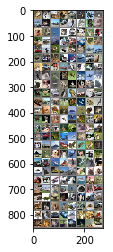

In [90]:
# Let us show some of the training images, for fun

import matplotlib.pyplot as plt
import numpy as np
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img  = img/2+0.5  #unormalized
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

#get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#sho images
imshow(torchvision.utils.make_grid(images))
#print labels
print(''.join('%5s'% classes[labels[j]] for j in range(4)))

### Define  a Convolutional Neural Network
We'll use the convolutional neural network `net`.

In [91]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

### Train the network

The advantage of using a dataset is the simplifictin of the looop.


In [98]:

for epoch in range(2): #loop over the dataset number of epoch
    
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        #get the inputs
        inputs, labels =  data
        
        #zero the parameter
        optimizer.zero_grad()
        
        #forward + backward + optimize
        output = net(inputs)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.item()
        if i % 2000 ==1999:  #print every2000 mini-batches
            print("[%d, %5d] loss: %.3f"%
                 (epoch+1, i+1,running_loss/2000))
            running_loss=0.0
print('Finished Training')

Finished Training


### Test the network on the test data

GroundTruth:    cat  ship  ship plane


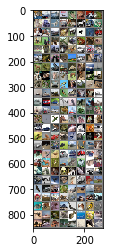

In [101]:
dataiter = iter(testloader)
images, labels  = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [105]:
outputs = net(images) #computed the predicted

_, predicted= torch.max(output,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:  truck truck truck truck


In [106]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 11 %


## Training on GPU

In [107]:
device = torch.device("cuda:0")
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [108]:
# data te device
inputs, labels = inputs.to(device), labels.to(device)